In [71]:
from poincare import Variable, System, initial, Derivative, Parameter, assign, Independent
from symbolite import scalar
from poincare import Simulator
import numpy as np
from itertools import product
import pandas as pd
import seaborn.objects as so
import matplotlib.pyplot as plt
from functools import partial
import ipywidgets as widgets

In [61]:
# Simulando con el paquete Poincaré
# https://github.com/maurosilber/poincare

class Model(System):
    # Define a variable with name `x` with an initial value (t=0) of `1``.
    x: Variable = initial(default=1)
    v: Derivative = x.derive(initial=1)
    k: Parameter = assign(default=1)
    mu: Parameter = assign(default=1)
  
    # The rate of change of `x` (i.e. velocity) is assigned (<<) to `-x`.
    # This relation is assigned to a Python variable (`eq`)
    eq = v.derive() << -( mu * (x**2 - 1) * v + k*x )

t = np.linspace(0, 50, 10000)
sim = Simulator(Model, transform = {"w":Model.v + Model.x**3 / 3 - Model.x, "x":Model.x})
mumu, kk = np.linspace(0.1, 1, 5), np.linspace(0.1, 1, 5)
x0s, v0s = np.linspace(-1, 1, 1), np.linspace(-1, 1, 5)
df = pd.concat([sim.solve(save_at=t, values={Model.mu : mu, Model.k : k, Model.x : x0, Model.v : v0}).assign(mu=mu, k=k, v0=v0, x0=x0) for mu, k, v0, x0 in product(mumu, kk, v0s, x0s)]).reset_index(drop=True)

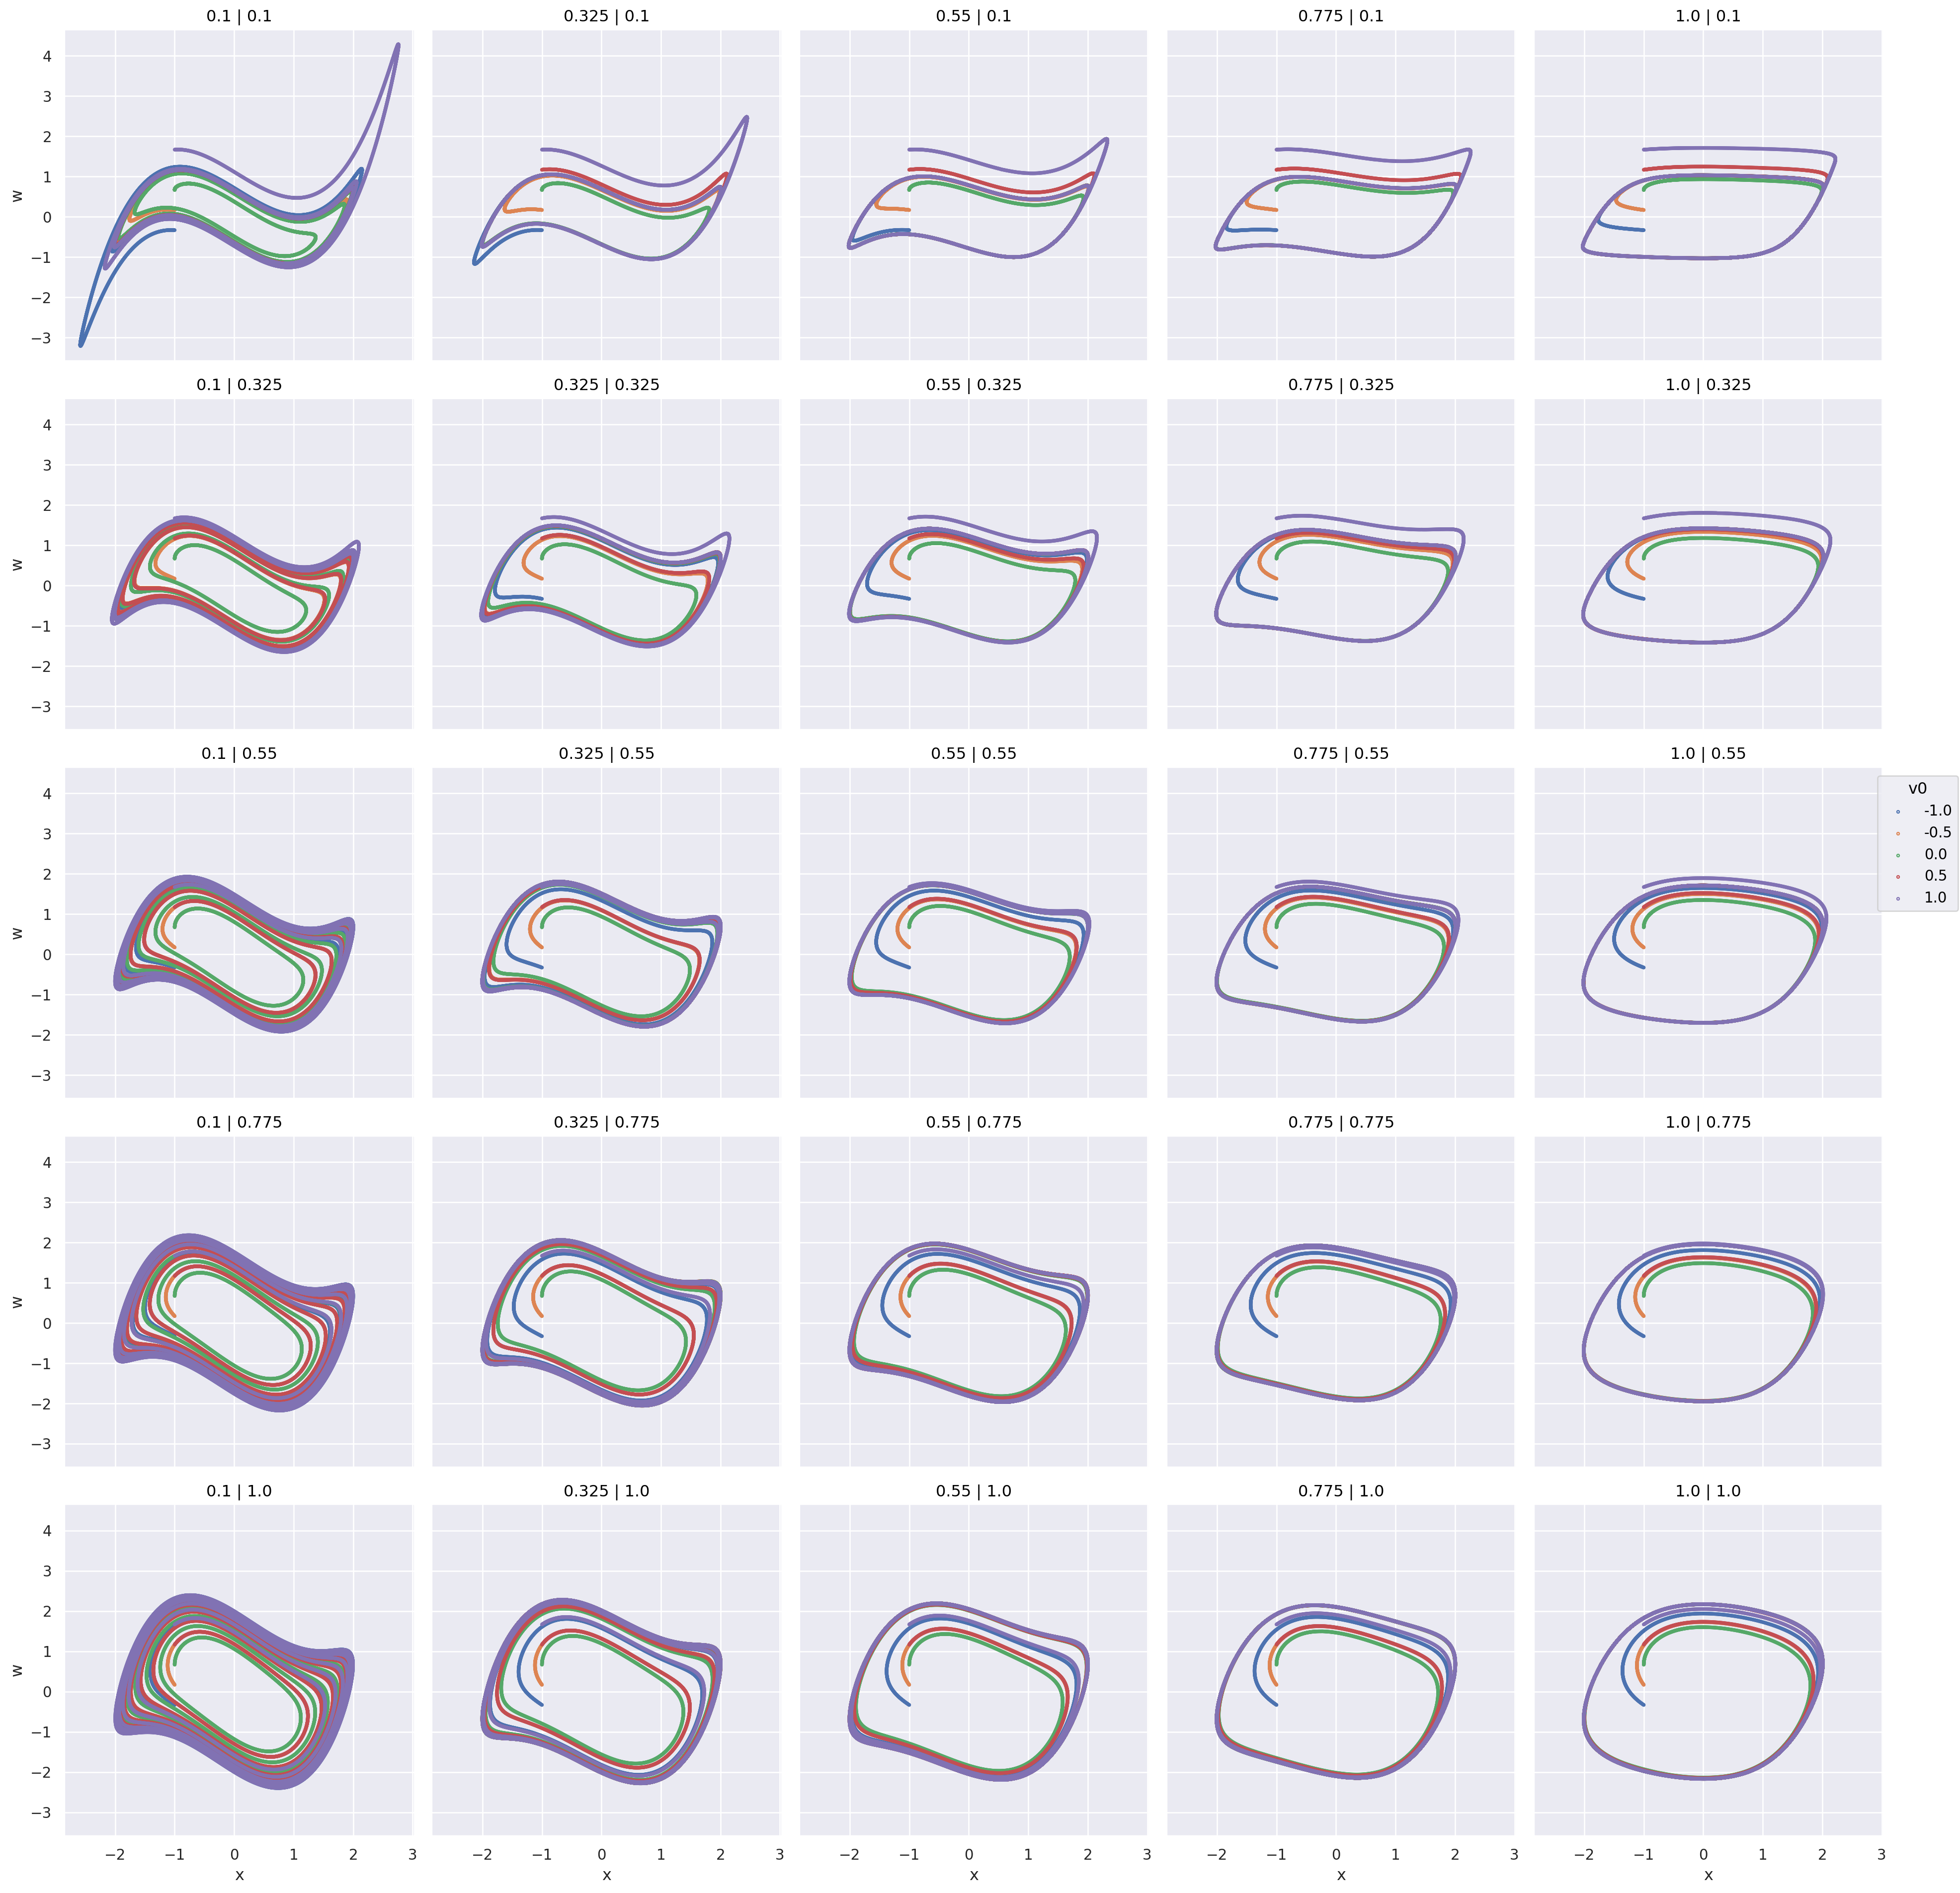

In [62]:
(so.Plot(df, x="x", y="w", color="v0")
    .add(so.Dots(marker='.'))
    .facet("mu", "k")
    .layout(size=(20, 20))
    .scale(color=so.Nominal())
    )

In [63]:
sim.interact(save_at=t, func=lambda df: df.plot(x="x", y="w"))

interactive(children=(FloatSlider(value=1.0, description='x', max=10.0, min=0.1), FloatSlider(value=1.0, descr…

# Modelo práctica 1

In [64]:

class Model(System):
    time = Independent()
    theta: Variable = initial(default=0)
    x: Variable = initial(default=1)
    vx: Derivative = x.derive(initial=1)

    alpha: Parameter = assign(default=-1)
    beta: Parameter = assign(default=1)
    delta: Parameter = assign(default=0.1)
    gamma: Parameter = assign(default=0.35)
    Omega: Parameter = assign(default=1.6)

    # Para usar funciones se tienen que importar de symbolite
    F = scalar.cos(Omega * time)

    eq = vx.derive() << - delta * vx - alpha * x - beta * x**3 + gamma * F

w = 1.6
T = 2 * np.pi / w
Omega = 1/T
transitorio = 5000
dt = 0.05

t = np.arange(0, 100*T, dt)
sim = Simulator(Model, transform={"x":Model.x, "vx":Model.vx, "F":Model.F})
df = sim.solve(save_at=t, values={Model.Omega:w})
df

,x,vx,F
time,,,
0.00,1.000000,1.000000,1.000000
0.05,1.050195,1.009600,0.996802
0.10,1.100732,1.013272,0.987227
0.15,1.151224,1.009948,0.971338
0.20,1.201509,0.999180,0.949235
...,...,...,...
392.45,0.573716,-0.108745,0.921632
392.50,0.569183,-0.072677,0.949697
392.55,0.566465,-0.036371,0.971686


In [65]:
def plot_solution(df, plot_force: bool = True):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
    if plot_force:
        df.iloc[transitorio:, :].plot(ax=ax1)
        df.iloc[transitorio:, :].plot(x="x", y="vx", ax=ax2)
    else:
        df.iloc[transitorio:, :-1].plot(ax=ax1)
        df.iloc[transitorio:, :-1].plot(x="x", y="vx", ax=ax2)

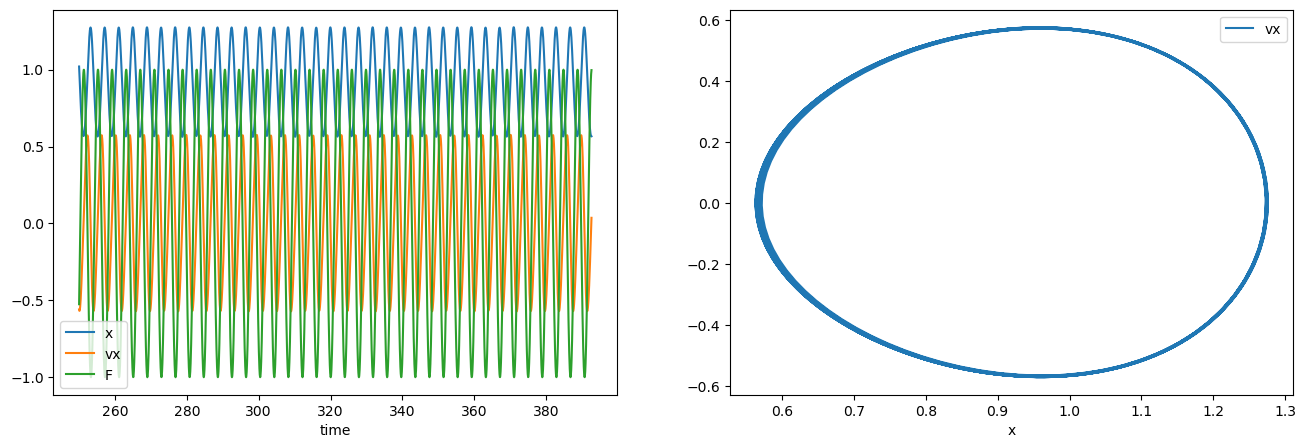

In [66]:
plot_solution(df)

In [ ]:
func = partial(plot_solution, plot_force=False)
sim.interact(save_at=t, func=func, values={Model.Omega : widgets.FloatSlider(min=0, max=3, value=1.6)})

interactive(children=(FloatSlider(value=1.6, description='Omega', max=3.0), Output()), _dom_classes=('widget-i…